### Import Libraries

In [155]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

### Load Data

In [156]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Plot an Image

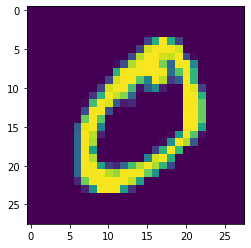

In [158]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1])

### Normalize Images

In [159]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

### Reshape Images

In [160]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

### Encode Image Labels

In [164]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Create the Model

In [174]:
model = Sequential()

model.add(Convolution2D(32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [184]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

### Compile the Model

In [175]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In [176]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 21s 49ms/step - loss: 0.3711 - accuracy: 0.8857 - val_loss: 0.0863 - val_accuracy: 0.9770
Epoch 2/10
422/422 [==============================] - 22s 53ms/step - loss: 0.1151 - accuracy: 0.9651 - val_loss: 0.0564 - val_accuracy: 0.9840
Epoch 3/10
422/422 [==============================] - 24s 57ms/step - loss: 0.0852 - accuracy: 0.9740 - val_loss: 0.0487 - val_accuracy: 0.9873
Epoch 4/10
422/422 [==============================] - 23s 53ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0428 - val_accuracy: 0.9893
Epoch 5/10
422/422 [==============================] - 23s 54ms/step - loss: 0.0642 - accuracy: 0.9799 - val_loss: 0.0418 - val_accuracy: 0.9885
Epoch 6/10
422/422 [==============================] - 23s 54ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0374 - val_accuracy: 0.9898
Epoch 7/10
422/422 [==============================] - 26s 61ms/step - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.0354 - val_accuracy:

### Evaluate the Model

In [177]:
score = model.evaluate(X_test, y_test, verbose=0)

In [178]:
print("accuracy", score[1])
print("loss", score[0])

accuracy 0.9894999861717224
loss 0.028314810246229172


### Make Predictions

In [179]:
predictions = model.predict(X_test[:20])
print("predictions:", np.argmax(predictions, axis=1))
print("labels     :", np.argmax(y_test[:20], axis=1))

predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
labels     : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
